In [11]:
import pandas as pd

# Load the dataset
file_path = 'complete_data_with_communities.csv'  # Update this path as needed
df = pd.read_csv(file_path)

# Convert the start and end dates to datetime for proper time handling
df['Start date'] = pd.to_datetime(df['Start date'])
df['End date'] = pd.to_datetime(df['End date'])

# Convert trip duration from milliseconds to minutes
df['Total duration (minutes)'] = df['Total duration (ms)'] / 60000  # 60000 ms = 1 minute

# Group by Start station and calculate the average trip duration for outbound trips in minutes
average_trip_duration = df.groupby(['Start station', 'Community_start']).agg(
    avg_duration=('Total duration (minutes)', 'mean')
).reset_index()

# Rename columns for clarity
average_trip_duration = average_trip_duration.rename(columns={
    'Start station': 'Station Name',
    'Community_start': 'Community',
    'avg_duration': 'Average Trip Duration (minutes)'
})

# Sort the DataFrame by Average Trip Duration in descending order
average_trip_duration = average_trip_duration.sort_values(by='Average Trip Duration (minutes)', ascending=False)

# Display the result
print(average_trip_duration.head())

# Save the result into a new DataFrame
df_average_trip_duration = average_trip_duration

# Optionally, save the DataFrame to a CSV file
df_average_trip_duration.to_csv('average_trip_duration_per_station.csv', index=False)


                                   Station Name  Community  \
331                Triangle Car Park, Hyde Park          3   
181                 Hyde Park Corner, Hyde Park          3   
4                        Albert Gate, Hyde Park          3   
336  Victoria & Albert Museum, South Kensington          3   
353                  Wellington Arch, Hyde Park          3   

     Average Trip Duration (minutes)  
331                        20.634118  
181                        19.696895  
4                          18.910295  
336                        18.437003  
353                        17.247638  


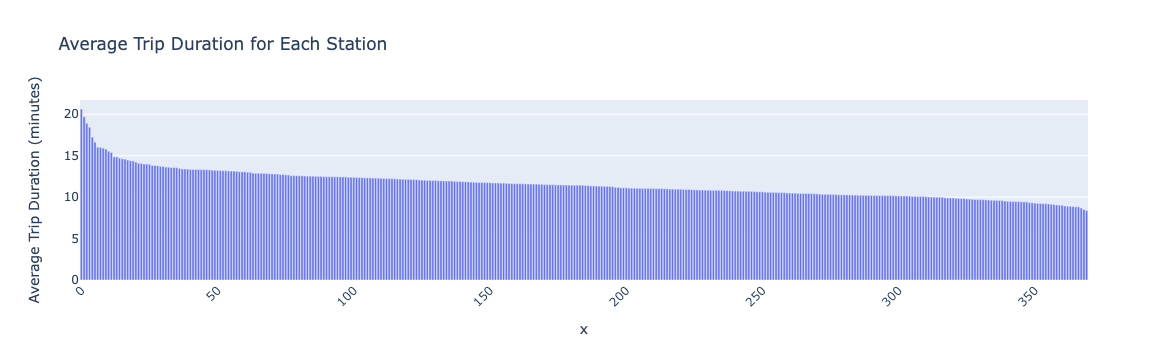

In [26]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = 'average_trip_duration_per_station.csv'  # Update this path as needed
df = pd.read_csv(file_path)


# Create a bar plot
fig = px.bar(
    df,
    x=range(len(df)),
    y='Average Trip Duration (minutes)',
    title='Average Trip Duration for Each Station',
    labels={'Station Name': 'Station Name', 'Average Trip Duration (minutes)': 'Average Trip Duration (minutes)'},
    hover_data={'Community': True, 'Station Name': True},
)

# Rotate x-axis labels for better readability
fig.update_layout(xaxis={'categoryorder': 'total descending'}, xaxis_tickangle=-45)

# Show the plot
fig.show()



Looking at communities

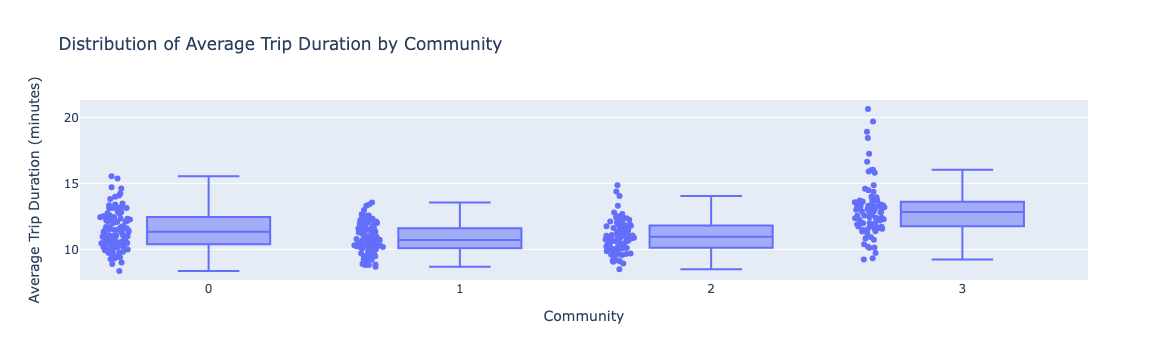

In [16]:
fig = px.box(
    df,
    x='Community',
    y='Average Trip Duration (minutes)',
    title='Distribution of Average Trip Duration by Community',
    points="all",  # Show all points
    labels={'Community': 'Community', 'Average Trip Duration (minutes)': 'Average Trip Duration (minutes)'}
)

fig.show()


In [22]:
import pandas as pd

# Load the dataset
file_path = 'complete_data_with_communities.csv'  # Update this path as needed
df = pd.read_csv(file_path)

# Convert the start and end dates to datetime for proper time handling
df['Start date'] = pd.to_datetime(df['Start date'])
df['End date'] = pd.to_datetime(df['End date'])

# Convert trip duration from milliseconds to minutes
df['Total duration (minutes)'] = df['Total duration (ms)'] / 60000  # 60000 ms = 1 minute

# Calculate the average trip duration for trips that start and end in the same community
community_trip_durations = df.groupby(['Community_start', 'Community_end']).agg({
    'Total duration (minutes)': 'mean'
}).reset_index()

# Pivot the table to create a matrix where rows represent starting communities and columns represent ending communities
community_trip_duration_matrix = community_trip_durations.pivot(index='Community_start', columns='Community_end', values='Total duration (minutes)')

# Sort the matrix if needed (optional, depending on your analysis requirements)
community_trip_duration_matrix_sorted = community_trip_duration_matrix.sort_index(axis=0).sort_index(axis=1)

# Display the matrix
print(community_trip_duration_matrix_sorted)

# Optionally, save the matrix to a CSV file
community_trip_duration_matrix_sorted.to_csv('community_trip_duration_matrix.csv')


Community_end            0          1          2          3
Community_start                                            
0                 8.762679  13.938748  16.245712  14.495039
1                14.296170   8.547607  11.742194  17.638551
2                16.625710  11.533228   8.698425  15.493928
3                15.120950  17.651246  15.284648  10.218822


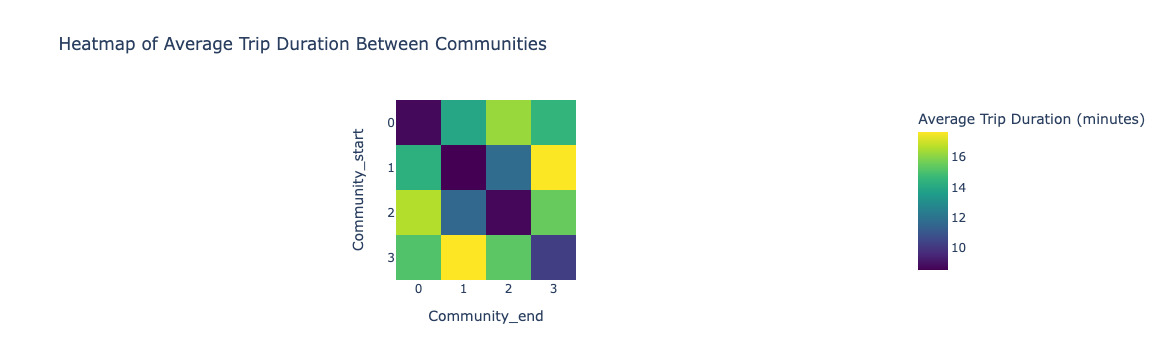

In [23]:
import plotly.express as px
import pandas as pd

file_path = 'community_trip_duration_matrix.csv'
data = pd.read_csv(file_path)
# Assuming 'community_trip_duration_matrix_sorted' is your DataFrame
data = {
    'Community_start': [0, 1, 2, 3],
    0: [8.762679, 14.296170, 16.625710, 15.120950],
    1: [13.938748, 8.547607, 11.533228, 17.651246],
    2: [16.245712, 11.742194, 8.698425, 15.284648],
    3: [14.495039, 17.638551, 15.493928, 10.218822]
}

# Convert the dictionary to a DataFrame
community_trip_duration_matrix_sorted = pd.DataFrame(data)
community_trip_duration_matrix_sorted.set_index('Community_start', inplace=True)

# Create a heatmap
fig = px.imshow(
    community_trip_duration_matrix_sorted,
    labels=dict(x="Community_end", y="Community_start", color="Average Trip Duration (minutes)"),
    x=community_trip_duration_matrix_sorted.columns,
    y=community_trip_duration_matrix_sorted.index,
    color_continuous_scale="Viridis",  # You can choose other color scales like "Cividis", "Plasma", "Inferno"
    title="Heatmap of Average Trip Duration Between Communities"
)

fig.show()


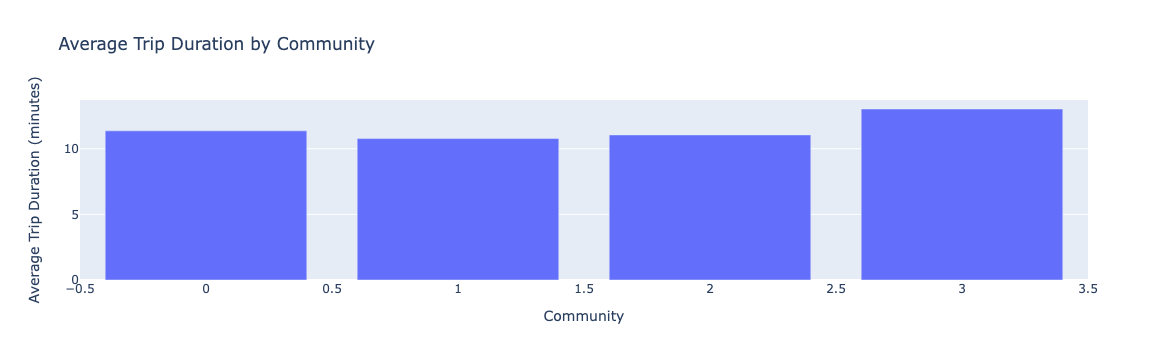

In [21]:
import plotly.express as px
import pandas as pd

# Load the dataset
file_path = 'complete_data_with_communities.csv'  # Update this path as needed
df = pd.read_csv(file_path)

# Convert the start and end dates to datetime for proper time handling
df['Start date'] = pd.to_datetime(df['Start date'])
df['End date'] = pd.to_datetime(df['End date'])

# Convert trip duration from milliseconds to minutes
df['Total duration (minutes)'] = df['Total duration (ms)'] / 60000  # 60000 ms = 1 minute

# Calculate the average trip duration for trips starting in each community
community_avg_trip_duration = df.groupby('Community_start').agg({
    'Total duration (minutes)': 'mean'
}).reset_index()

# Rename columns for clarity
community_avg_trip_duration = community_avg_trip_duration.rename(columns={
    'Community_start': 'Community',
    'Total duration (minutes)': 'Average Trip Duration (minutes)'
})

# Create a bar plot for the average trip duration by community
fig = px.bar(
    community_avg_trip_duration,
    x='Community', 
    y='Average Trip Duration (minutes)',
    title='Average Trip Duration by Community',
    labels={'Community': 'Community', 'Average Trip Duration (minutes)': 'Average Trip Duration (minutes)'},
    hover_data={'Average Trip Duration (minutes)': True}
)

fig.show()
